In [15]:
import pandas as pd
import numpy as np
import itertools
import math
import time
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

from g4l.data import Sample
import g4l.display

from g4l.estimators import CTM
from g4l.estimators import Prune
from g4l.estimators import SMC
import g4l.tree.generation as gen
import g4l.tree as tree

In [16]:
max_depth = 4
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])

In [17]:
start_time = time.time()
t_incr = tree.ContextTree(X, max_depth=max_depth, tree_initialization_method=gen.incremental)
print("Completed in", round(time.time() - start_time, 2), "seconds")

Completed in 0.49 seconds


In [18]:
start_time = time.time()
prune_trees = Prune(t_incr)
prune_trees.execute()
print("Completed in", round(time.time() - start_time, 2), "seconds")

Completed in 7.66 seconds


In [19]:
start_time = time.time()
smc_trees = SMC(t_incr)
smc_trees.execute(penalty_interval=(0.1, 400), epsilon=0.01)
print("Completed in", round(time.time() - start_time, 2), "seconds")

Completed in 92.99 seconds


In [20]:
prune_results = np.array([[t.num_contexts(), t.log_likelihood(), t.to_str()] for t in prune_trees.context_trees]).T
smc_results = np.array([[t.num_contexts(), t.log_likelihood(), t.to_str()] for t in smc_trees.context_trees]).T

In [21]:
# Tree generation summary for pruning method
prune_summary = pd.DataFrame(prune_results.T, columns=['num_contexts', 'log-likelihood', 'tree'])
prune_summary['num_contexts'] = prune_summary['num_contexts'].astype(int)
prune_summary = prune_summary.sort_values(['num_contexts'])
prune_summary

,num_contexts,log-likelihood,tree
0,5,-76845.38611413533,0 1 2 3 4
1,7,-76845.38611413533,0 04 1 14 2 3 34
2,9,-76845.38611413533,0 034 04 1 134 14 2 3 334
3,10,-76845.38611413533,0 0334 034 04 1 134 14 2 3 3334
4,13,-76845.38611413533,0 03 0334 034 04 1 13 134 14 2 33 3334 43
...,...,...,...
70,140,-76845.38611413533,0000 0001 0010 0012 0013 0014 0020 0030 0032 0...
71,143,-76845.38611413533,0000 0001 0010 0012 0013 0014 0020 0030 0032 0...
72,145,-76845.38611413534,0000 0001 0010 0012 0013 0014 0020 0021 0030 0...
73,146,-76845.38611413533,0000 0001 0010 0012 0013 0014 0020 0021 0030 0...


In [22]:
# Tree generation summary for SMC method
smc_summary = pd.DataFrame(smc_results.T, columns=['num_contexts', 'log-likelihood', 'tree'])
smc_summary['num_contexts'] = smc_summary['num_contexts'].astype(int)
smc_summary = smc_summary.sort_values(['num_contexts'])
smc_summary

,num_contexts,log-likelihood,tree
15,5,-142183.64197348506,0 1 2 3 4
14,8,-92694.62170580606,00 1 10 2 20 3 30 4
13,11,-78275.20328747839,000 1 10 100 2 20 200 3 30 300 4
12,13,-77977.08311576815,000 001 10 100 2 20 200 201 21 3 30 300 4
11,14,-77796.83361878229,000 001 010 100 2 20 200 201 21 210 3 30 300 4
10,15,-77624.62815801032,000 001 0010 100 2 20 200 201 2010 21 210 3 30...
9,16,-77487.90040097007,0000 001 0010 100 2 20 200 2000 201 2010 21 21...
8,19,-77466.76139704465,0000 001 0010 0210 100 1210 2 20 200 2000 201 ...
7,22,-77411.27176312433,0000 001 0010 0210 030 100 1210 130 2 20 200 2...
6,25,-77395.58585318908,0000 001 0010 0210 03 030 100 1210 13 130 2 20...


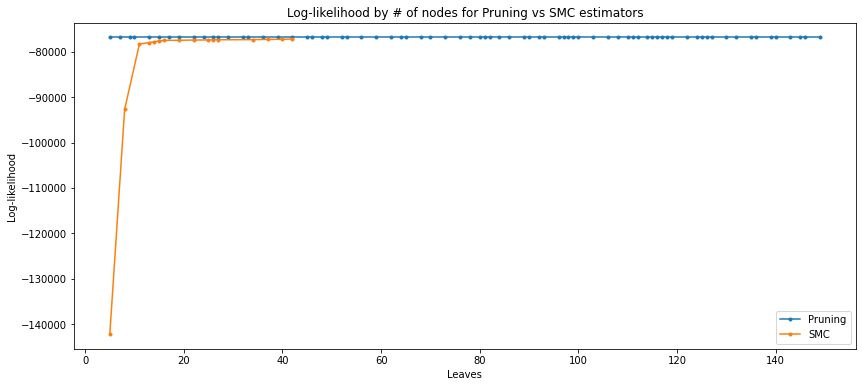

In [23]:
prune_results = np.array([[t.num_contexts(), t.log_likelihood()] for t in prune_trees.context_trees]).T
smc_results = np.array([[t.num_contexts(), t.log_likelihood()] for t in smc_trees.context_trees]).T
plt.figure(figsize=(14, 6))
plt.title('Log-likelihood by # of nodes for Pruning vs SMC estimators')
plt.plot(prune_results[0], prune_results[1], marker='.', label='Pruning')
plt.plot(smc_results[0], smc_results[1], marker='.', label='SMC')
plt.xlabel('Leaves')
plt.ylabel('Log-likelihood')
#plt.xlim((10, ))
plt.legend()
plt.show()

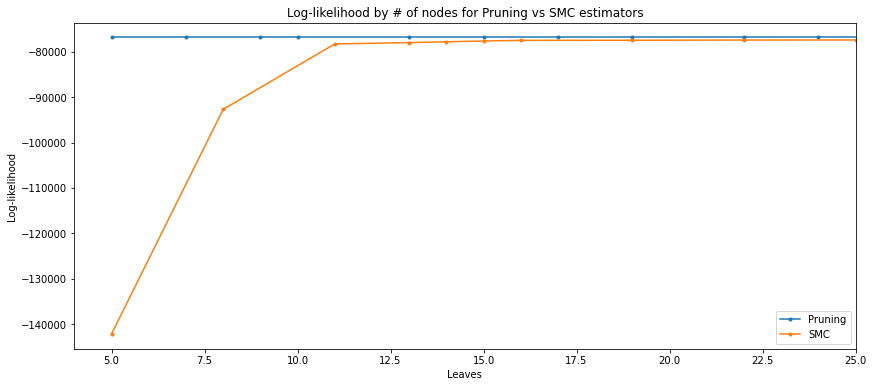

In [24]:
prune_results = np.array([[t.num_contexts(), t.log_likelihood()] for t in prune_trees.context_trees]).T
smc_results = np.array([[t.num_contexts(), t.log_likelihood()] for t in smc_trees.context_trees]).T
plt.figure(figsize=(14, 6))
plt.title('Log-likelihood by # of nodes for Pruning vs SMC estimators')
plt.plot(prune_results[0], prune_results[1], marker='.', label='Pruning')
plt.plot(smc_results[0], smc_results[1], marker='.', label='SMC')
plt.xlabel('Leaves')
plt.ylabel('Log-likelihood')
plt.xlim((4, 25))
plt.legend()
plt.show()

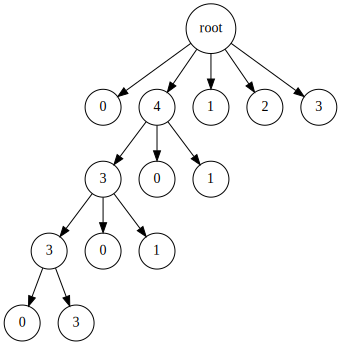

In [25]:
g4l.display.draw_tree(prune_trees.context_trees[3])

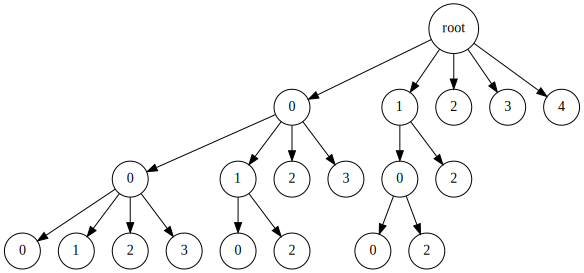

In [26]:
g4l.display.draw_tree(smc_trees.context_trees[11])

In [27]:
smallest_pruned_tree = prune_trees.context_trees[0].tree()
pruned_0_lps = smallest_pruned_tree[smallest_pruned_tree.node=='0'].lps
pruned_0_lps = pruned_0_lps.values[0]

minval = math.inf
for c in np.arange(164.59, 164.69, 0.001):
    try:
        t = CTM(t_incr).execute(c).tree()
        x = t[t.node=='0'].lps.values[0]
        minval = min(minval, x)
        if minval==x:
            print('c: ', c)
            print('Likelihood found using smc method: ', minval)
            break
    except:
        pass

print('Likelihood found using pruning method: ', pruned_0_lps)



c:  164.6550000000003
Likelihood found using smc method:  -70407.80766818802
Likelihood found using pruning method:  -35737.664746203656


In [28]:
smallest_smc_tree = prune_trees.context_trees[-1].tree()
pruned_0_lps = smallest_pruned_tree[smallest_pruned_tree.node=='0'].lps
pruned_0_lps

2   -35737.664746
Name: lps, dtype: float64

In [46]:
xx = CTM(t_incr).execute(0.000000001).tree().sort_values(['lps'])
xx

,node_idx,active,depth,depth_idx,freq,lps,node,num_child_nodes,parent_idx,type
83,83,1,4,9,5159,-5.073153e+03,2010,NaN,32,L
85,85,1,4,11,6102,-4.209240e+03,1020,NaN,30,L
90,90,1,4,16,4071,-4.135963e+03,0210,NaN,22,L
82,82,1,4,8,4696,-3.987094e+03,0201,NaN,31,L
84,84,1,4,10,5796,-3.788614e+03,0102,NaN,23,L
...,...,...,...,...,...,...,...,...,...,...
214,214,1,4,140,1,-4.596067e-08,3432,NaN,59,L
222,222,1,4,148,1,-4.596067e-08,3343,NaN,72,L
217,217,1,4,143,1,-4.596067e-08,4304,NaN,68,L
216,216,1,4,142,4,-4.596067e-08,0134,NaN,69,L
